In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
tdf = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
tdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
tdf.shape

(145460, 23)

# 1. Missing values analysis
# - Variables with missing values
# - Percentage of missing values for each variable as a dataframe
# - Drop missing values in RainToday and RainTomorrow variables

In [5]:
tdf.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

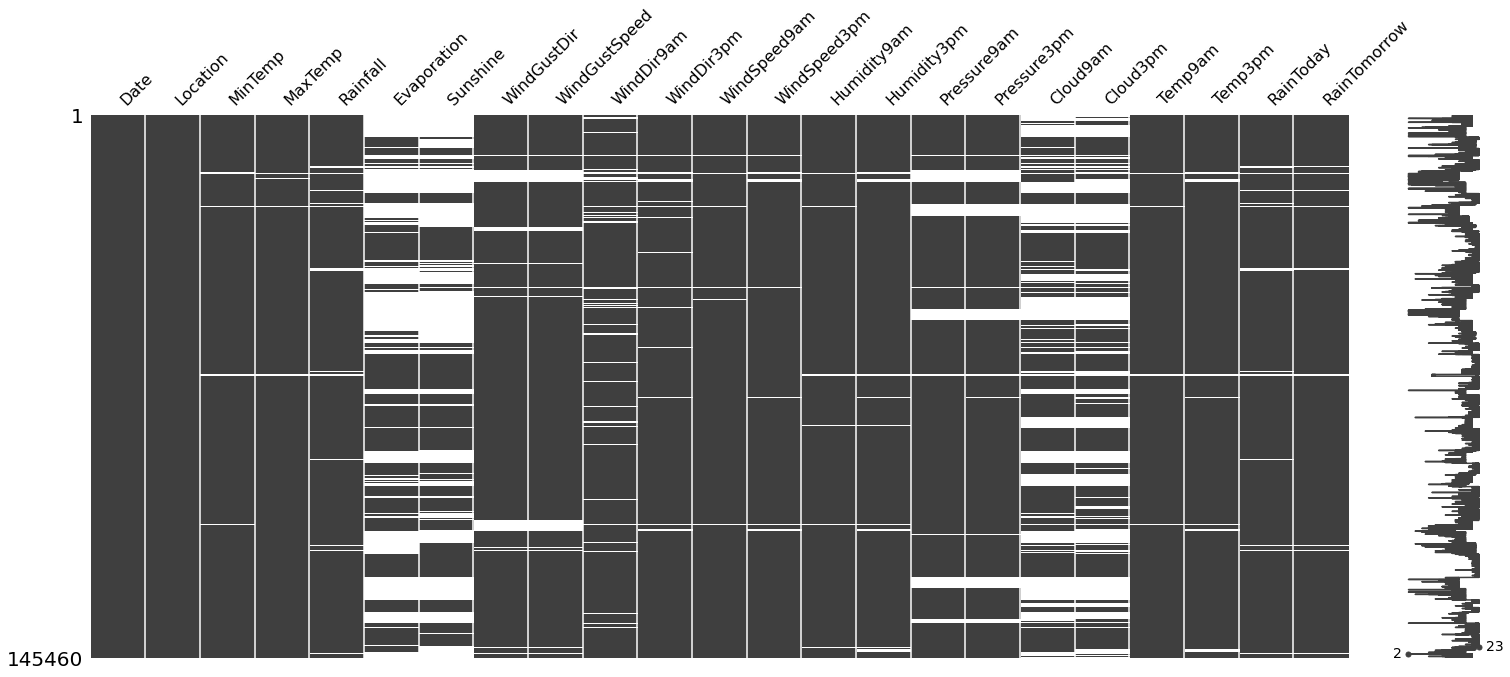

In [6]:
import missingno as msno
msno.matrix(tdf);

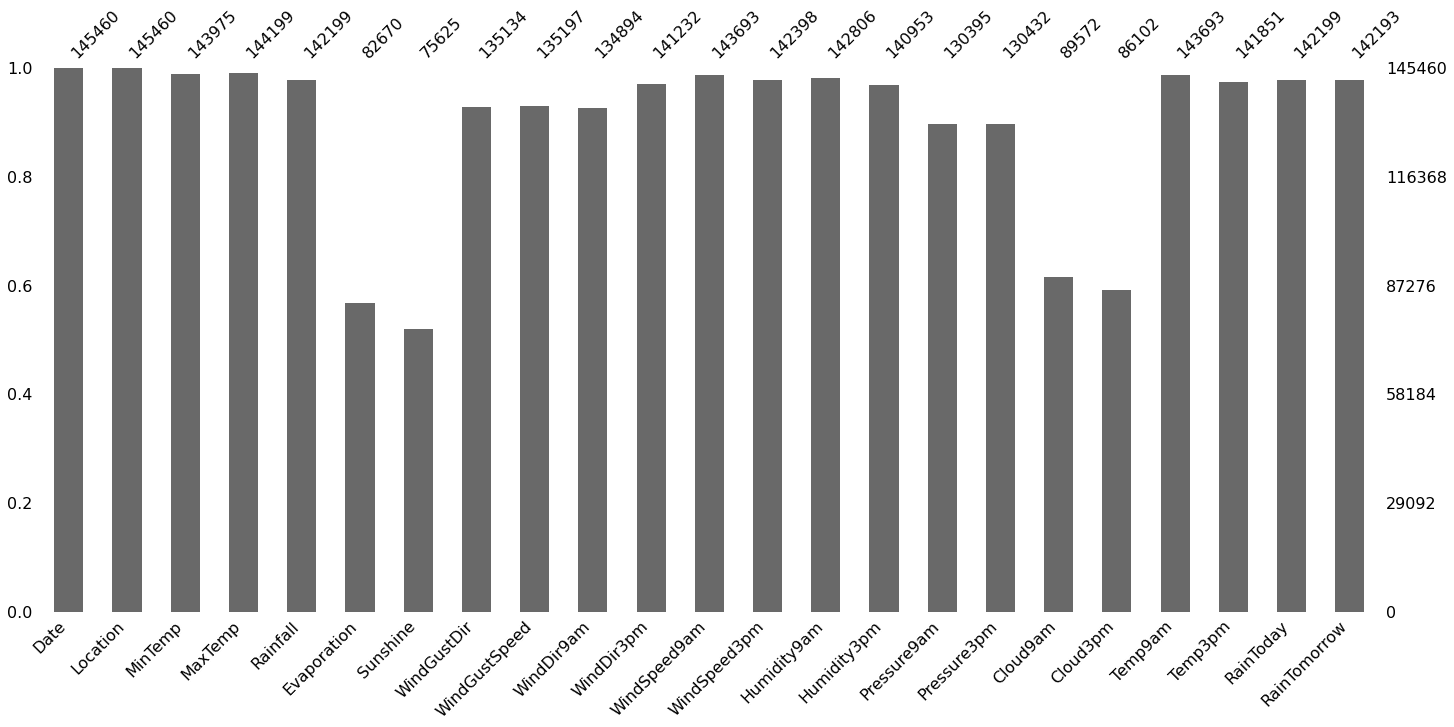

In [7]:
msno.bar(tdf);

In [8]:
missing_val = []
missing_val_rate = []
for i in tdf.columns:
    u = tdf[i].isnull().sum()
    r = (u/len(tdf)*100)
    missing_val.append(u)
    missing_val_rate.append(r)
    
y=pd.DataFrame( {"no of missing_val": missing_val,  "missing_val_rate": missing_val_rate},  index=tdf.columns)
y.sort_values("missing_val_rate", ascending=False)



,no of missing_val,missing_val_rate
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [9]:
tdf.dropna(subset=['RainTomorrow','RainToday'], inplace = True)

In [10]:
tdf.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

# 2. Multivariate imputation with (a) selected algorithm(s) and label encoding
# Tip: May consider to drop some categorical variables with too many categories, if it takes too much time to get a result
# Tip: Do not forget to encode categorical variables.
# Tip: You get error if you have data type such as string or date. The values should be integer or float.

In [11]:
 tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [12]:
unique_val = []
for i in tdf.select_dtypes(include=['object']).columns:
    u = tdf[i].nunique()
    unique_val.append(u)
    
pd.DataFrame({"No. of unique values": unique_val}, index=tdf.select_dtypes(include=['object']).columns)

,No. of unique values
Date,3436
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


In [52]:
tdf_multi = tdf.sample(50000).copy()
tdf_multi = tdf_multi.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'], axis=1)
tdf_multi = pd.get_dummies(tdf_multi, drop_first=True, columns = ['RainToday','RainTomorrow'], prefix = ['RainToday','RainTomorrow'])
tdf_multi.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
139065,1.2,25.7,0.0,NaN,NaN,26.0,0.0,9.0,25.0,7.0,1022.6,1017.4,NaN,NaN,11.9,24.9,0,0
140682,24.3,32.0,0.8,5.6,1.8,26.0,9.0,9.0,68.0,64.0,1010.4,1007.7,7.0,7.0,27.8,31.0,0,0
91264,17.2,25.5,0.0,NaN,NaN,31.0,20.0,22.0,61.0,63.0,1026.3,1023.2,NaN,NaN,23.7,22.2,0,0
123016,12.9,29.2,0.0,6.2,10.8,31.0,4.0,19.0,56.0,40.0,1018.3,1014.9,1.0,2.0,22.1,27.0,0,0
63195,2.6,25.1,0.0,NaN,NaN,28.0,9.0,7.0,82.0,44.0,1016.7,1011.8,4.0,1.0,12.2,23.9,0,0


In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

index = tdf_multi.index
columns = tdf_multi.columns

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(tdf_multi)
tdf_multi_imputed = imp_mean.transform(tdf_multi)
tdf_multi_imputed

array([[ 1.2, 25.7,  0. , ..., 24.9,  0. ,  0. ],
       [24.3, 32. ,  0.8, ..., 31. ,  0. ,  0. ],
       [17.2, 25.5,  0. , ..., 22.2,  0. ,  0. ],
       ...,
       [10.3, 16.6,  4. , ..., 16.2,  1. ,  1. ],
       [13.1, 30.9,  0. , ..., 28.7,  0. ,  0. ],
       [21.9, 30.1,  2.6, ..., 28.7,  1. ,  0. ]])

In [54]:
tdf_multi_imputed = pd.DataFrame(tdf_multi_imputed, index=index, columns=columns)
tdf_multi_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [55]:
tdf_multi_imputed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
139065,1.2,25.7,0.0,6.580910,12.508829,26.0,0.0,9.0,25.0,7.0,1022.6,1017.4,-0.319254,1.036981,11.9,24.9,0.0,0.0
140682,24.3,32.0,0.8,5.600000,1.800000,26.0,9.0,9.0,68.0,64.0,1010.4,1007.7,7.000000,7.000000,27.8,31.0,0.0,0.0
91264,17.2,25.5,0.0,5.898274,7.994665,31.0,20.0,22.0,61.0,63.0,1026.3,1023.2,3.872680,4.482987,23.7,22.2,0.0,0.0
123016,12.9,29.2,0.0,6.200000,10.800000,31.0,4.0,19.0,56.0,40.0,1018.3,1014.9,1.000000,2.000000,22.1,27.0,0.0,0.0
63195,2.6,25.1,0.0,3.020855,10.237304,28.0,9.0,7.0,82.0,44.0,1016.7,1011.8,4.000000,1.000000,12.2,23.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34237,17.3,28.3,0.0,5.000000,5.000000,69.0,9.0,39.0,65.0,36.0,1003.7,995.0,6.000000,4.000000,20.7,26.5,0.0,1.0
38903,2.1,20.4,0.0,4.200000,11.200000,26.0,9.0,13.0,58.0,33.0,1021.8,1020.3,1.000000,1.000000,14.6,19.9,0.0,0.0
68055,10.3,16.6,4.0,1.600000,2.400000,35.0,17.0,19.0,68.0,47.0,1021.8,1021.3,7.000000,7.000000,12.1,16.2,1.0,1.0
70761,13.1,30.9,0.0,9.600000,13.500000,30.0,19.0,11.0,47.0,21.0,1017.9,1014.6,0.000000,0.000000,19.8,28.7,0.0,0.0


In [16]:
from sklearn.tree import DecisionTreeRegressor

tdf_multi2 = tdf.sample(5000).copy()
tdf_multi2 = tdf_multi2.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'], axis=1)
tdf_multi2 = pd.get_dummies(tdf_multi2, drop_first=True, columns = ['RainToday','RainTomorrow'], prefix = ['RainToday','RainTomorrow'])

index = tdf_multi2.index
columns = tdf_multi2.columns

imp_mean = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_mean.fit(tdf_multi2)
tdf_multi2_imputed = imp_mean.transform(tdf_multi2)
tdf_multi2_imputed

array([[23.2, 30.8,  1.2, ..., 28.1,  1. ,  1. ],
       [16.2, 27.5,  0.2, ..., 25.8,  0. ,  0. ],
       [23.9, 33.3,  0. , ..., 26.5,  0. ,  1. ],
       ...,
       [17.6, 24.8,  0. , ..., 22.9,  0. ,  0. ],
       [ 4. , 11.8,  4.6, ..., 11.8,  1. ,  1. ],
       [19.4, 21.9,  0. , ..., 21.6,  0. ,  1. ]])

In [17]:
tdf_multi2_imputed = pd.DataFrame(tdf_multi2_imputed, index=index, columns=columns)
tdf_multi2_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsRegressor

tdf_multi3 = tdf.sample(5000).copy()
tdf_multi3 = tdf_multi3.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'], axis=1)
tdf_multi3 = pd.get_dummies(tdf_multi3, drop_first=True, columns = ['RainToday','RainTomorrow'], prefix = ['RainToday','RainTomorrow'])

index = tdf_multi3.index
columns = tdf_multi3.columns

imp_mean = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
imp_mean.fit(tdf_multi3)
tdf_multi3_imputed = imp_mean.transform(tdf_multi3)
tdf_multi3_imputed

array([[ 3.1, 13.8,  0. , ..., 13.2,  0. ,  0. ],
       [25.2, 33. ,  0. , ..., 31.6,  0. ,  0. ],
       [24.1, 31.8,  2.6, ..., 29.6,  1. ,  1. ],
       ...,
       [22.4, 26.3,  0. , ..., 25.6,  0. ,  0. ],
       [24.6, 32. ,  0.4, ..., 31. ,  0. ,  1. ],
       [ 7.6, 26.5,  0. , ..., 22.6,  0. ,  0. ]])

In [19]:
tdf_multi3_imputed = pd.DataFrame(tdf_multi3_imputed, index=index, columns=columns)
tdf_multi3_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

# 3. Outliers
# Apply Z-score method to detect outliers
# Apply IQR method/boxplot visualization for selected variables to detect outliers
# Apply Isolation Forest and Local Outlier Factor methods to detect outliers
# Tip: Consider standardization based on the algorithm that you use.
# Decide on a threshold observation to replace outliers
# Replace the outliers with the threshold observation

In [20]:
from scipy import stats
import numpy as np

types = ['float64']
tdf_numeric = tdf.select_dtypes(include=types)

z = np.abs(stats.zscore(tdf_numeric))
threshold = 3
print('list of outliers:', '\n', np.where(z > 3)[0], '\n', np.where(z > 3)[1])
print('number of outliers:', np.where(z > 3)[0].shape)


list of outliers: 
 [   292    427    448 ... 140608 140609 140721] 
 [2 2 2 ... 2 2 2]
number of outliers: (2409,)


# IQR

In [21]:
# First we will calculate IQR
Q1 = tdf_numeric.quantile(0.25)
Q3 = tdf_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.2
MaxTemp          10.4
Rainfall          0.8
Evaporation       4.8
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.4
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
dtype: float64


In [22]:
(tdf_numeric < (Q1 - 1.5 * IQR)) |(tdf_numeric > (Q3 + 1.5 * IQR))

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145455,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
tdf_numeric_Hum = tdf_numeric['Humidity9am']
Q1 = tdf_numeric_Hum.quantile(0.25)
Q3 = tdf_numeric_Hum.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

26.0


In [25]:
# create filter to detect values below and above outlier thresholds
(tdf_numeric_Hum < (Q1 - 1.5 * IQR)) |(tdf_numeric_Hum > (Q3 + 1.5 * IQR))

0         False
1         False
2         False
3         False
4         False
          ...  
145454    False
145455    False
145456    False
145457    False
145458    False
Name: Humidity9am, Length: 140787, dtype: bool

In [26]:
# Values below or above outlier thresholds
print(tdf_numeric_Hum[(tdf_numeric_Hum < (Q1 - 1.5 * IQR)) | (tdf_numeric_Hum > (Q3 + 1.5 * IQR))])
print(tdf_numeric_Hum[(tdf_numeric_Hum < (Q1 - 1.5 * IQR)) | (tdf_numeric_Hum > (Q3 + 1.5 * IQR))].shape)

6304      17.0
6306      17.0
6321      15.0
6322       9.0
6341      15.0
          ... 
145263    16.0
145264    13.0
145265    17.0
145342    15.0
145353    17.0
Name: Humidity9am, Length: 1414, dtype: float64
(1414,)


In [31]:
import plotly.express as px

fig = px.box(tdf, y="Humidity9am",)
fig.show()

# Isolation Forest

In [58]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

y = tdf_multi_imputed['Humidity9am']
X = tdf_multi_imputed.drop(['Humidity9am'], axis=1)

clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.10, random_state=42)
clf.fit(X)
y_pred = clf.predict(X)

# the model will predict an inlier with a label of +1 and an outlier with a label of -1

outliers_values = X[clf.predict(X) == -1]
outliers_values

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
99866,12.8,34.7,0.0,4.4,13.10000,93.0,9.0,7.0,27.000000,1006.5,1005.1,7.000000,7.000000,23.4,32.100000,0.0,0.0
130136,10.7,12.2,9.0,0.6,1.00000,35.0,9.0,9.0,83.000000,994.6,992.2,5.000000,7.000000,11.5,11.500000,1.0,1.0
143806,23.5,26.0,0.0,19.0,3.63576,31.0,17.0,7.0,59.695562,1009.4,1007.1,8.000000,7.032093,25.5,23.817646,0.0,1.0
13728,17.7,33.6,0.0,10.8,9.10000,74.0,37.0,30.0,22.000000,1016.3,1010.6,3.000000,3.000000,21.9,33.400000,0.0,1.0
14154,20.4,40.2,1.0,12.0,11.60000,80.0,11.0,6.0,10.000000,1005.3,1002.6,1.000000,3.000000,29.7,39.400000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82625,6.7,11.3,0.2,3.6,0.30000,37.0,17.0,9.0,99.000000,1014.3,1012.5,7.414563,8.378763,9.3,9.700000,0.0,1.0
105292,5.9,13.1,23.9,6.6,2.30000,83.0,48.0,44.0,95.000000,982.0,986.4,7.000000,8.971791,9.9,10.100000,1.0,1.0
67031,26.0,34.7,0.0,16.4,10.70000,63.0,28.0,28.0,58.000000,1005.6,1007.1,7.000000,6.000000,28.1,24.600000,0.0,0.0
10878,17.5,24.4,16.8,3.4,0.90000,15.0,7.0,9.0,73.000000,1019.0,1018.7,7.000000,8.000000,20.5,23.800000,1.0,1.0


In [60]:
outliers_values.shape

(5000, 17)


# Local Outlier Factor

In [63]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = tdf_multi_imputed.columns

#note that we transform the data with MinMaxScaler
tdf_multi_imputed_scaled = scaler.fit_transform(tdf_multi_imputed)
tdf_multi_imputed_scaled = pd.DataFrame(tdf_multi_imputed_scaled, columns=columns)

y = tdf_multi_imputed_scaled['Humidity9am']
X = tdf_multi_imputed_scaled.drop(['Humidity9am'], axis=1)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
np.sort(X_scores)[:100]

array([-2.60900769, -2.23581453, -2.17135433, -2.0685289 , -2.03677792,
       -2.0255684 , -2.01814354, -2.00824413, -2.00292829, -1.98737189,
       -1.9694962 , -1.9417943 , -1.91218224, -1.90980479, -1.90215085,
       -1.89490683, -1.88870102, -1.88391985, -1.87815477, -1.87585604,
       -1.85726565, -1.84923891, -1.84538342, -1.83822789, -1.83783694,
       -1.80062644, -1.79193539, -1.78926415, -1.78151852, -1.78041323,
       -1.77827825, -1.7608586 , -1.75201722, -1.74977596, -1.74770773,
       -1.74612061, -1.74565091, -1.74250032, -1.74194681, -1.73921151,
       -1.7378976 , -1.73732997, -1.73629028, -1.73449835, -1.73255066,
       -1.72916049, -1.72885143, -1.72579782, -1.72484131, -1.7191624 ,
       -1.71339085, -1.71259545, -1.71142978, -1.70856479, -1.70673591,
       -1.70234876, -1.70086673, -1.69829599, -1.6954541 , -1.69189041,
       -1.69176454, -1.69137226, -1.68445601, -1.68298076, -1.67804747,
       -1.67779099, -1.67248368, -1.67175668, -1.66594395, -1.66

In [88]:
# threshold
threshold = np.sort(X_scores)[100]
threshold

-1.630039062886079

In [89]:
# filter to detect to outliers
inliers = X_scores > threshold
inliers

array([ True,  True,  True, ...,  True,  True,  True])

In [91]:
X[(X_scores > threshold)==False].shape

(101, 17)

In [92]:
X[(X_scores > threshold)==False]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
905,0.326683,0.343570,0.004223,0.060867,0.383938,0.211382,0.259951,0.024096,0.701177,0.222037,0.213445,0.511412,0.573633,0.298283,0.326214,0.0,0.0
1458,0.418953,0.420345,0.366554,0.105583,0.393644,0.227642,0.248205,0.180723,0.533089,0.657763,0.647059,0.511412,0.478028,0.390558,0.417476,1.0,0.0
1489,0.473815,0.416507,0.004223,0.436982,0.558550,0.377472,0.177724,0.254408,0.342492,0.554257,0.554622,0.596847,0.370903,0.442060,0.399841,0.0,0.0
1856,0.316708,0.437620,0.000000,0.582351,0.801277,0.227642,0.248205,0.156627,0.271619,0.697830,0.687395,0.169670,0.095606,0.375536,0.434951,0.0,0.0
2113,0.800499,0.844530,0.016892,0.194699,0.553845,0.650407,0.248205,0.265060,0.635809,0.474124,0.448739,0.255105,0.669239,0.843348,0.642718,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46425,0.605985,0.660269,0.000000,0.141628,0.306266,0.382114,0.353926,0.313253,0.252942,0.726210,0.692437,0.169670,0.000000,0.598712,0.660194,0.0,0.0
46761,0.653367,0.502879,0.000000,0.199314,0.432483,0.349593,0.259951,0.265060,0.682500,0.534224,0.643697,0.425976,0.382422,0.557940,0.466019,0.0,0.0
47022,0.628429,0.790787,0.000000,0.132398,0.680062,0.288285,0.025015,0.240964,0.719853,0.527546,0.485714,0.340541,0.000000,0.613734,0.586408,0.0,0.0
49666,0.842893,0.850288,0.000000,0.169317,0.622111,0.195122,0.154230,0.108434,0.943971,0.547579,0.487395,0.169670,0.382422,0.828326,0.842718,0.0,0.0



# Replace the outliers with the threshold observation

In [93]:
# Deleting observations based on the LOF threshold
tdf_numeric_no2 = tdf_multi_imputed[(X_scores > threshold)==True]
print(tdf_multi_imputed.shape)
print(tdf_numeric_no2.shape)

(50000, 18)
(49899, 18)


In [95]:
#Before deleting
fig = px.box(tdf, y=tdf.Humidity9am)
fig.show()

In [74]:
#After deleting
fig = px.box(tdf_numeric_no2, y=tdf_numeric_no2.Humidity9am)
fig.show()

In [75]:
# the threshold observation
tdf_multi_imputed[(X_scores == threshold)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
90044,23.0,29.0,17.2,36.6,5.976316,39.0,13.0,20.0,82.0,73.0,1013.3,1011.5,5.0,8.0,26.0,28.3,1.0,1.0


In [77]:

threshold_row = tdf_multi_imputed[(X_scores == threshold)]
outliers = tdf_multi_imputed[(X_scores < threshold)]
# We get rid of the indexes of outliers and transformed them into array
outliers.to_records(index = False)
# We define a variable for outlier array
outliers_array = outliers.to_records(index = False)

# We replace all the outliers with the threshold row
outliers_array[:] = threshold_row.to_records(index = False)

tdf_numeric_no3 = tdf_multi_imputed.copy()

# the outlier observations after replacement by the threshold observation
tdf_numeric_no3[(X_scores < threshold)] = pd.DataFrame(outliers_array, index = tdf_numeric_no3[(X_scores < threshold)].index)
tdf_numeric_no3[(X_scores < threshold)].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
40442,23.0,29.0,17.2,36.6,5.976316,39.0,13.0,20.0,82.0,73.0,1013.3,1011.5,5.0,8.0,26.0,28.3,1.0,1.0
111366,23.0,29.0,17.2,36.6,5.976316,39.0,13.0,20.0,82.0,73.0,1013.3,1011.5,5.0,8.0,26.0,28.3,1.0,1.0
108984,23.0,29.0,17.2,36.6,5.976316,39.0,13.0,20.0,82.0,73.0,1013.3,1011.5,5.0,8.0,26.0,28.3,1.0,1.0
11681,23.0,29.0,17.2,36.6,5.976316,39.0,13.0,20.0,82.0,73.0,1013.3,1011.5,5.0,8.0,26.0,28.3,1.0,1.0
107522,23.0,29.0,17.2,36.6,5.976316,39.0,13.0,20.0,82.0,73.0,1013.3,1011.5,5.0,8.0,26.0,28.3,1.0,1.0
